## Naive Bayes from Scratch

Jacob L. Fine

March 10th, 2025

Many methods used to classify samples based on their features rely on numerical optimization, where model parameters are iteratively updated to minimize some loss function. This can be slow and computationally expensive especially when the number of features and/or model parameters is very high. 

Working with parameters that can be estimated using a closed-form expression is usually considerably faster and cheaper, and more cost effectivce, when applicable.

Here, we will implement a basic classifier that does not require numerical optimization: the Naive Bayes model.


Suppose we would like to classify $n$ data points into one of two classes, $y=0$ or $y=1$, where each ith data point is a $p$-dimensional vector: $X_i=[x_{i1},x_{i2},...x_{ip}]$

We can now express the probability that the ith sample belongs to a particular class $y$ as 

$$P(y_i|x_{i1},x_{i2},...x_{ip})$$

Using this, we can compute the probability that the data point belongs to each one of the classes, and classify that data point based on whichever class is more probable. This is a key component of Naive Bayes. 

We therefore wish to select the class as the value that maximizes the above probability, which is defined as maximum a posteriori (MAP) estimation. Let us continue working but just no longer specify the $i$ sample.

Therefore
$$\hat{y}_{MAP}  = \text{argmax}_{y} P(y|x_{1},x_{2},...x_{p})$$

This differs from the familiar maximum likelihood estimator, which maximizes the likelihood, i.e., the joint probability of the data conditioned on the paramter (below). The MAP, on the other hand, is maximizing the posterior (obtained from Bayes rule): the value of the parameter conditioned on the data.

$$\hat{y}_{MLE}  = \text{argmax}_{y} P(x_1,x_2,...x_p|y)$$

Importantly, both $\hat{y}_{MAP}$ and $\hat{y}_{MLE}$ are just different estimators of $y$, but they differ in how they incorporate prior information about $y$. 

Using Bayes rule, we can write that

$$P(y|x_{1},x_{2},...x_{p}) = \frac{P(x_1,x_2,...x_p|y)P(y)}{P(x_1,x_2,...x_p)}$$

where $P(y)$ is the prior distribution of $y$. And, since $P(x_1,x_2,...x_p)$ does not depend on $y$, when we optimize for $y$ to find the MLE or MAP, we can treat this as a constant so that will cancel out. Also, notably, if $P(y)$ is uniform, then we can see that finding the MAP and MLE will lead to the same result. We can therefore see that solving for $\hat{y}_{MLE}$ is a special case of solving for $\hat{y}_{MAP}$ when we assume that all values of the prior are equally likely, i.e., the parameter has a uniform prior distribution. 

In Naive Bayes, we use the 'naive' assumption that the $p$ features are conditionally independent, the definition of which is

$$P(x_1,x_2,...x_p|y) = P(x_1|y)P(x_2|y)...P(x_p|y)$$
$$\implies P(x_1,x_2,...x_p|y) = \prod_{j=i}^pP(x_j|y)$$

This is the likelihood. We can therefore take a hard-to-calculate conditional joint density and express it as an easy-to-calculate product of conditional marginal densities (note that a density doesn't have to be between 0 and 1). Note that we're using $j$ to index the product since we usually think of features as columns. And, the prior $P(y)$ is easy to calculate if we already know the labels of our samples, i.e.,

$$P(y) = \frac{\text{number of samples in the class}}{\text{total number of samples}}$$

Now, we can express our estimate for the class label in the Naive Bayes model as

$$\hat{y}_{MAP}  = \text{argmax}_{y} P(y)\prod_{j=i}^pP(x_j|y)$$

In practice we usually use the log-likelihood to make operations less prone to numerical overflow/underflow. Therefore

$$\hat{y}_{MAP}  = \text{argmax}_{y} \big[ \text{log}P(y) + \sum_{j=1}^p \text{log}P(x_j|y) \big]$$


To develop an intuition of this, we can simply compare, for each datapoint, the value of $ \text{log}P(y) + \sum_{j=1}^p \text{log}P(x_j|y)$ for each of the two values of $y$, and select the value of $y$ that gives us the larger value of the expression. 

Using this expression, let us know implement it on real-world data below.

In [256]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
features = iris.feature_names
df = pd.DataFrame(iris.data, columns=features)
df['species'] = [iris.target_names[value] for value in iris.target] # gets the value from the list of values based on target
df['species'].value_counts() 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In this case, each class is equally likely, so we have the prior

$$P(y)=1/3$$
for all classes

All we now need is to estimate the likelihood

$$\prod_{j=i}^pP(x_j|y)$$



In [257]:
# the df looks like this
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


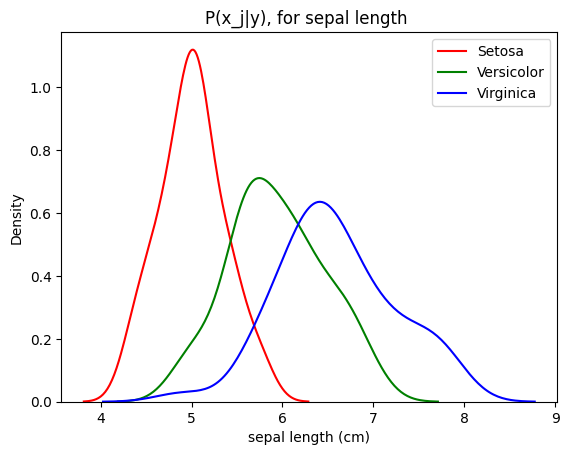

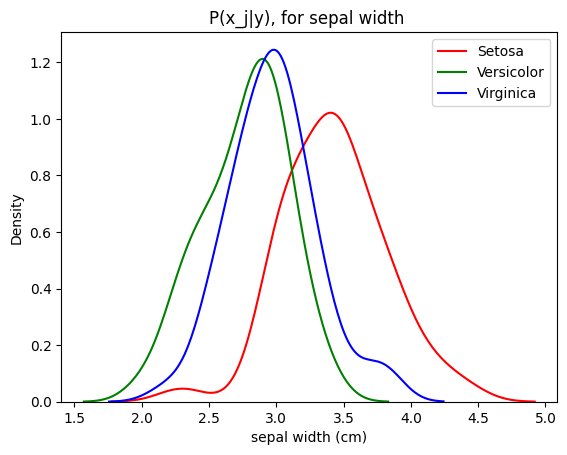

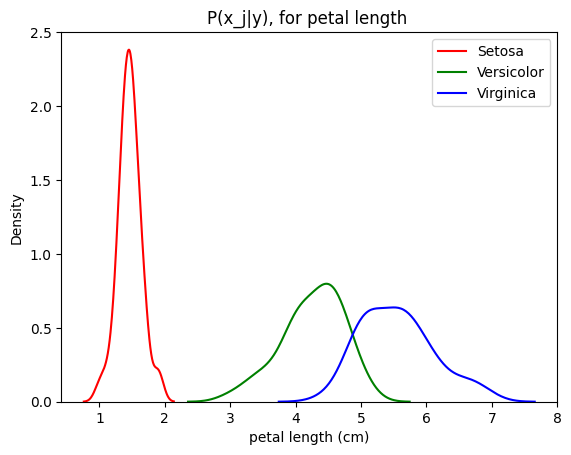

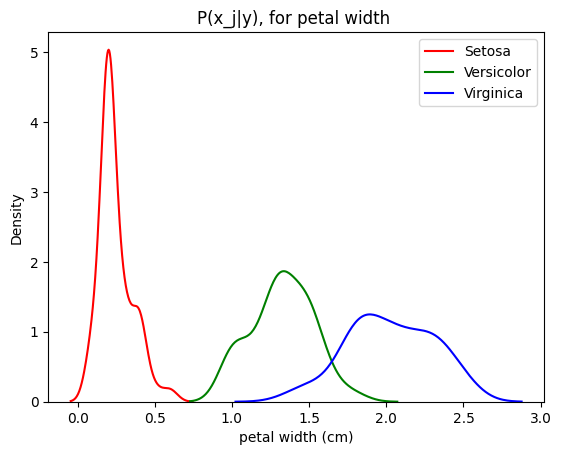

<Figure size 640x480 with 0 Axes>

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_p_x_given_y(df,feature):
    sns.kdeplot(df[df['species'] == 'setosa'][feature], color='red', label='Setosa')
    sns.kdeplot(df[df['species'] == 'versicolor'][feature], color='green', label='Versicolor')
    sns.kdeplot(df[df['species'] == 'virginica'][feature], color='blue', label='Virginica')

    plt.legend()
    plt.xlabel(f"{feature}")
    plt.ylabel("Density")
    plt.title(f"P(x_j|y), for {feature.split('(')[0]}")
    plt.show()
    plt.clf()

for feature in iris.feature_names:
    plot_p_x_given_y(df,feature)

Intuitively, if we observe a flower with large petal width, large pedal length, large sepal length, but small-mid sepal width, we would best classify this as 'virginica'. We can find visually observe trends for the other classes.

In the above, we are plotting the distribution of each feature given the class, $P(X_j|y)$. Here, the number of dimensions of each data point is $p=4$ since there are four features.

We may wish to approximate the distributions as multivariate Gaussians conditioned on each class, with the conditional independence assumption. This will allow us to simply calculate the mean and variance for the data in each class, so that we may estimate the pdf $P(x_1,x_2,x_3,x_4|y)$ for each class. 

This will give us a 'Gaussian Naive Bayes' (GNB).

Let's also check for normality with a Shapiro-Wilk test. If p>0.05 we can consider the our feature has a normal distribution.

In [259]:
# Check for normality wi

from scipy.stats import shapiro

for species in df['species'].unique():
    print(f"\nNormality test for {species}:")
    for feature in features:
        stat, p = shapiro(df[df['species'] == species][feature])
        print(f"{feature}: p-value = {p:.4f}")


Normality test for setosa:
sepal length (cm): p-value = 0.4595
sepal width (cm): p-value = 0.2715
petal length (cm): p-value = 0.0548
petal width (cm): p-value = 0.0000

Normality test for versicolor:
sepal length (cm): p-value = 0.4647
sepal width (cm): p-value = 0.3380
petal length (cm): p-value = 0.1585
petal width (cm): p-value = 0.0273

Normality test for virginica:
sepal length (cm): p-value = 0.2583
sepal width (cm): p-value = 0.1809
petal length (cm): p-value = 0.1098
petal width (cm): p-value = 0.0870


Of the 12 cases, only 2 failed the Shaprio-Wilk test. But we may still proceed with the normality assumption, based on considering this, along with the plots of the data.

In [260]:
# Gets the means and vars for each class; each class has its mean and var for each of the four features
class_stats = df.groupby("species").agg(["mean", "var"])

# Store results in a dictionary of lists; one for means other for vars. We don't need to expliclty use a covariance matrix 
# since all off-diagonal entries would be zero; as the features are conditionally indpendent
mean_variance_dict = {}
for species in df['species'].unique():
    mean_vector = list(class_stats.loc[species, (slice(None), 'mean')].values)  # for mean vector
    variance_vector = list(class_stats.loc[species, (slice(None), 'var')].values) # for variance vector
    
    mean_variance_dict[species] = {
        "means": [round(value,4) for value in mean_vector],
        "vars": [round(value,4) for value in variance_vector]
    }

for key, value in mean_variance_dict.items():
    print(key)
    print(value)
    print('')

setosa
{'means': [5.006, 3.428, 1.462, 0.246], 'vars': [0.1242, 0.1437, 0.0302, 0.0111]}

versicolor
{'means': [5.936, 2.77, 4.26, 1.326], 'vars': [0.2664, 0.0985, 0.2208, 0.0391]}

virginica
{'means': [6.588, 2.974, 5.552, 2.026], 'vars': [0.4043, 0.104, 0.3046, 0.0754]}



Using these vectors, that is all we need to generate multivariate normal distributions for each class. 

In [261]:
import numpy as np

# Returns the Gaussian likelihood for a feature being a particular value
# We take the product of the likelihood of each feature to get the joint likelihood
# Takes in the value of x, and the mean and a var for that x in a given class
def likelihood_feature(x, mean, var):
    # This is the distribution P(X_j|Y); so we can get the likelihood of a feature given the paramter. 
    # Also note that this is not a probability; it is a density; so it doesn't have to be between 0 and 1.
    # This is because our features are continuous, so we must work with densities
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))


In [262]:
# let's store the priors as a dict
priors = df['species'].value_counts(normalize=True).round(4).to_dict()

priors

{'setosa': 0.3333, 'versicolor': 0.3333, 'virginica': 0.3333}

With the priors and the likelihoods, we can define a function to calculate the posteriors, for each class.

In [309]:
def posterior_for_class(row):
    # we can now define the posterior. Will be applied to rows of df
    # For each class, we can calculate the posterior, and then find the class that maximizes the posterior probability

    # define the 4-dimensional data point
    groups = list(priors.keys()) 


    features = list(df.columns[:-1])

    n_features = len(features) # should be four
    # loop through the groups, and get the posterior for each group
    class_posteriors = {}

    for group in groups:    
        # means for the group
        means = mean_variance_dict[group]['means']
        # vars for the group
        vars = mean_variance_dict[group]['vars']
        likelihood_for_class = 0  # sets the likelihood for the group

        for j in range(n_features): # repeats calcualtion for each feature; to update likelihood for that group
            x = row[features[j]] # the value of that feature
            u = means[j] # mean of the feature
            s = vars[j] # var of the feature
            likelihood_for_class += np.log(likelihood_feature(x,u,s))  # updates the likelihood for class

        # sets the posterior as likelihood times prior (in logs); adds prior
        class_prior = priors[group]
        # defines this using \text{log}P(y) + \sum_{j=1}^p \text{log}P(x_j|y) 
        class_posterior = np.log(class_prior) + likelihood_for_class
        label_group = f'{group}_post'
        class_posteriors[label_group] = class_posterior
    
    posteriors_series = pd.Series(class_posteriors)  # returns posteriors as pd series
    
    argmax_y = posteriors_series.idxmax() # gets the argmax
    posteriors_series['NB_prediction'] = argmax_y.split('_')[0]
    return posteriors_series

In [267]:
# Apply the function and unpack posteriors + predicted class
df_results = df.apply(posterior_for_class, axis=1, result_type="expand")

df[list(df_results.columns)] = df_results  # adds cols to the origina df

Let us visually inspect how the classifer performed, by sampling from the dataframe, and comparing the species and NB_prediction columns.

In [291]:
import random
df.sample(20,random_state=42).sort_values(by='species')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,setosa_post,versicolor_post,virginica_post,NB_prediction
18,5.7,3.8,1.7,0.3,setosa,-2.250782,-34.369897,-49.670024,setosa
19,5.1,3.8,1.5,0.3,setosa,0.566507,-37.986524,-54.027950,setosa
31,5.4,3.4,1.5,0.4,setosa,-0.481027,-31.347280,-48.404619,setosa
9,4.9,3.1,1.5,0.1,setosa,-0.164816,-39.616331,-56.453161,setosa
36,5.5,3.5,1.3,0.2,setosa,-0.291448,-39.693864,-55.885285,setosa
12,4.8,3.0,1.4,0.1,setosa,-0.593203,-41.012369,-58.156647,setosa
73,6.1,2.8,4.7,1.2,versicolor,-219.534625,-1.274646,-7.459151,versicolor
69,5.6,2.5,3.9,1.1,versicolor,-134.438145,-2.106740,-13.756505,versicolor
56,6.3,3.3,4.7,1.6,versicolor,-261.727676,-3.651197,-4.311644,versicolor
82,5.8,2.7,3.9,1.2,versicolor,-142.547440,-1.134257,-11.436193,versicolor


In [308]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define true vs predicted labels
y = df['species']
y_pred = df['NB_prediction']

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Get macro-average precision (average the precision and recall of each class), recall, and F1-score
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")


Accuracy: 0.9600
Precision (Macro): 0.9600
Recall (Macro): 0.9600


For this dataset, the Naive Bayes classifier seemed to work very well. Although in many other settings, the naive assumption (conditional independence of the features) is not likely to hold. The Naive Bayes classifier can be seen as a special case a Bayesian network (consisting of $p+1$ nodes, $p$ feature nodes and 1 class node), where the naive assumption is valid, and all feature nodes desend from the root node, which is the class node. In this case, the root node would be the class (which flower it is) and the leaves would be the four features (arrows point from class node to feature nodes). But in general, the model we get depends largely on how we factorize the joint probability $P(x_1,x_2,...x_p|y)$. In Naive Bayes, we just take the product of the conditional marginals. But in a Bayesian network, we factorize using the structure of the network, by conditioning the probability of each node on its parents. But ultimately, we are interested in classifying a $p$-dimensional data point (one of the observations) into one of the classes based on its features. This is achieved by $\text{argmax}_{y} P(y|x_{1},x_{2},...x_{p})$. 